In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc

from matplotlib import rc
fontsize = 8
fontstyle = {
    "pdf.fonttype": 42, # type 3 pdf fonts
    "mathtext.default": 'regular', # italic math
    'mathtext.fontset': 'cm',
    'font.family' : 'STIXGeneral',
    "text.usetex": True, # latex-based math
    # sans-serif Helvetica font
    #"text.latex.preamble":
    #    r'\usepackage{helvet} \usepackage{sansmath} \sansmath',
    #"font.family": "sans-serif",
    # font sizes
    "axes.labelsize": fontsize,
    'axes.titlesize': fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    'xtick.direction': "inout",
    'xtick.top': True,
    'xtick.major.size': 4,
    'xtick.major.width': 0.5,
    'xtick.minor.width': 0.5,
    "ytick.labelsize": fontsize,
    'ytick.direction': "inout",
    'ytick.right': True,
    'ytick.major.size': 4,
    'ytick.major.width': 0.5,
    'ytick.minor.width': 0.5,
    "axes.linewidth": 0.5,
}

plt.rcParams.update(fontstyle)
letters_lower = [r"$\mathrm{\bf{%s}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"]
letters_round = [r"$\mathrm{\bf{(%s)}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"] 
letters_upper = [r"$\bf{%s}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz".upper()] 
letters_map = {"round": letters_round, "upper": letters_upper, "lower":letters_lower}  
def lettering(ax, x, y, num, color="k", mode="round", **kwargs):     
    letters = letters_map[mode]     
    ax.text(x, y, letters[num], weight="bold", transform=ax.transAxes,             
            horizontalalignment="center", verticalalignment="center", color=color, **kwargs)

In [182]:
def Pxslice(x, t, x0, v0, a, b, s0, vth):
    x = t*v0 - x
    dx = t*t*vth*vth + s0*s0
    y = (2*x + x0) *  t*t*vth*vth + (x + x0)*s0*s0
    z = t*vth*s0*np.sqrt(2*dx)
    px = np.exp(-x*x / (2*dx)) / np.sqrt(8*np.pi * dx)  
    if z == 0:
        px *= (2*(np.heaviside(xs - (x0+a), 1) + np.heaviside(x0+b - xs,1))) - 2
    else:
        px *= ( erf( (y+b*dx)/z) - erf( (y+a*dx)/z )  )
    return px
    
def Pxslices(x, t, J, d, g, s0, vth):
    pxs = []
    for mJ in range(-J, J+1):
        x0 = 2 * mJ * d *s0
        if vth == 0:
            v0 = - mJ * g
        else:
            v0 = - mJ * g * vth
        a = -d*s0
        b = d*s0
        if np.abs(mJ) < J:
            pxs.append( Pxslice(x, t, x0, v0, a, b, s0, vth) )
        elif mJ == J:
            pxs.append( Pxslice(x, t, x0, v0, a, np.inf, s0, vth) )
        elif mJ == -J:
            pxs.append( Pxslice(x, t, x0, v0, -np.inf, b, s0, vth) )
    pxs = np.array(pxs)
    return(pxs)
            
    

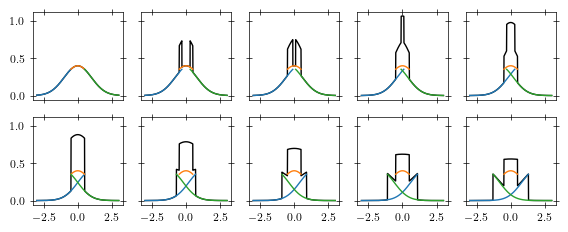

In [222]:
xs = np.linspace(-3, 3, 1000)
ts = np.linspace(0.0, 1.8, 10)
fig, axs = plt.subplots(2,5, figsize=(3.375*2,2.5), sharex=True, sharey=True)
for ti, t in enumerate(ts):
    r, c = int(ti/5), ti % 5
    ax = axs[r, c]
    pxslices = Pxslices(xs, t=t, J=1, d=0.5, g=1e12, s0=1, vth=1e-12)
    ax.plot(xs, np.sum(pxslices, axis=0), lw=1, c="k")
    for pxi, pxslice in enumerate(pxslices):
        color = f"C{pxi}"
        mask = pxslice > 1e-6
        ax.plot(xs[mask], pxslice[mask], lw=1, ls="-", color=color)
    #ax.set_xticks([-3, 0, 3])
    #ax.set_yticks([0, 0.25, 0.5, 0.75])

In [262]:
def invR2(d, J):
    return 1 - 4 * d * np.sum([
        d*(2*mJ+1) * erfc(d*(2*mJ+1)/np.sqrt(2)) + np.sqrt(2/np.pi)*np.exp(-(2*mJ+1)**2/2)
    for mJ in range(J)])

[0.97063531 0.96152213 0.95240895 0.94329576 0.93418258 0.9250694
 0.91595622 0.90684304 0.89772986 0.88861668 0.8795035  0.87039032
 0.86127714 0.85216396 0.84305078 0.8339376  0.82482442 0.81571123
 0.80659805 0.79748487 0.78837169 0.77925851 0.77014533 0.76103215
 0.75191897 0.74280579 0.73369261 0.72457943 0.71546625 0.70635307]
[0.96912963 0.95954916 0.9499687  0.94038824 0.93080778 0.92122732
 0.91164686 0.9020664  0.89248594 0.88290548 0.87332502 0.86374455
 0.85416409 0.84458363 0.83500317 0.82542271 0.81584225 0.80626179
 0.79668133 0.78710087 0.77752041 0.76793994 0.75835948 0.74877902
 0.73919856 0.7296181  0.72003764 0.71045718 0.70087672 0.69129626]
[0.96752428 0.9574456  0.94736693 0.93728826 0.92720958 0.91713091
 0.90705224 0.89697356 0.88689489 0.87681622 0.86673754 0.85665887
 0.8465802  0.83650152 0.82642285 0.81634418 0.8062655  0.79618683
 0.78610816 0.77602949 0.76595081 0.75587214 0.74579347 0.73571479
 0.72563612 0.71555745 0.70547877 0.6954001  0.68532143 0.675

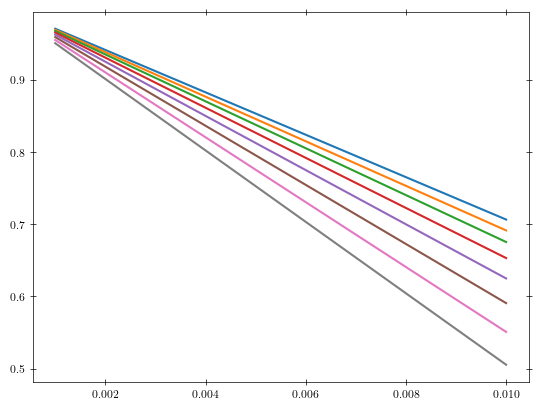

In [263]:
ds = np.linspace(0.001, 0.01, 30)
for J in (1,2,3,4,5,6,7,8):
    print(invR2(ds, J))
    plt.plot(ds, invR2(ds, J))